# Learning Objectives

By the end of this class, you will be able to...

- Compute probability density functions and cumulative density functions
- Use the `scipy.stats` package to compute the Survival Value or CDF Value for a known distribution

In [5]:
import numpy as np 
import pandas as pd 

df = pd.read_csv('../titanic.csv')

## Probability Distribution Function (PDF)

First let's review the difference between discrete and continuous random variables:

- **Discrete:** takes on a finite or countable number of values.
- **Continuous:** takes on an infinite number of values

Because continuous random variables can take on an infinite number of values, we can't say with certantiy what value the variable will be at any point, so we have to instead provide an **interval, or range** of values that the variable could be.

### An Example
For example, what's the probability that New York City get's 4 inches of snow on December 17th? 3.99999 and 4.0001 inches don't count, it has to be _exactly_ 4. It would be impossible to say with exact certainty given there are infinite decimals! However, if instead of looking for exactly 4, we looked at the range of values between 3.9 and 4.1, we could compute the probability for that range! This is where PDFs come in to help us calculate this!

### Graphing PDFs
When we graph a PDF, it has a similar pattern to a histogram. The main difference is that instead of the y-axis corresponding to values, it shows the percent probability of the x-axis values. This is known as _normalizing the values_.

## Activity: Reminder of how to Plot Histograms

To start, let's plot the histogram for the Age of people on the Titanic. To do this, we'll use the [seaborn](https://seaborn.pydata.org/) library

## Activity (Remind Histogram): Plot the Histogram of Age for Titanic Dataset

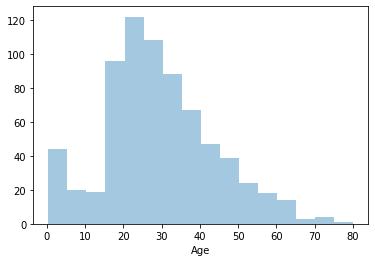

In [6]:
import seaborn as sns
# create a list of Age values not including N/A values
ls_age = df['Age'].dropna()
# Now plot the data in this list into a histogram!
sns.distplot(ls_age, hist=True, kde=False, bins=16)

- Lets now plot the PDF of the same data

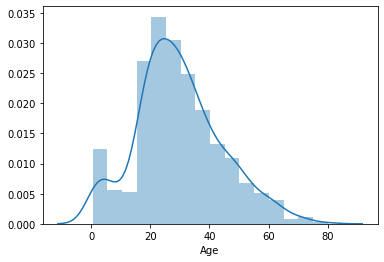

In [7]:
import seaborn as sns
# Notice only the KDE parameter is different!
# What does kde stand for? https://seaborn.pydata.org/generated/seaborn.distplot.html
sns.distplot(df['Age'].dropna(), hist=True, kde=True, bins=16)

## Activity: Proving our PDF

We know that the y-axis shows the percent probability of the x-axis values. But where do the y-axis numbers come from? For example, for  Ages 20-25, why is the y-value around 0.030?

Let's prove it!

In [8]:
# custom histogram function, 
# Same as calling sns.distplot(ls_age, hist=True, kde=False, bins=16),
# but instead of plotting, returns a dictionary with a RANGE as the key (20.315, 25.28875),
# and TOTAL NUMBER OF VALUES IN THAT RANGE (122) as values
def custom_hist(ls, interval):
    hist_ls_dict = dict()
    # min value in the range of values
    min_ls = np.min(ls)
    # max value in the range of values
    max_ls = np.max(ls)
    print(max_ls)
    # distance between each bin
    I = ((max_ls - min_ls) / interval)
    print(I)
    # Create the dictionary
    for j in range(interval):
#         print((min_ls + j*I, min_ls + (j+1) *I))
#         print(np.sum(((min_ls + j*I) <=ls) & (ls <= (min_ls + (j+1) *I))))
        hist_ls_dict[(min_ls + j*I, min_ls + (j+1) *I)]= np.sum(((min_ls + j*I) <=ls) & (ls <= (min_ls + (j+1) *I)))      
    return hist_ls_dict
        
print(custom_hist(df['Age'].dropna().values, 16))

80.0
4.97375
{(0.42, 5.39375): 44, (5.39375, 10.3675): 20, (10.3675, 15.34125): 19, (15.34125, 20.315): 96, (20.315, 25.28875): 122, (25.28875, 30.262500000000003): 108, (30.262500000000003, 35.23625): 88, (35.23625, 40.21): 67, (40.21, 45.18375): 47, (45.18375, 50.1575): 39, (50.1575, 55.13125): 24, (55.13125, 60.105000000000004): 18, (60.105000000000004, 65.07875): 14, (65.07875, 70.0525): 3, (70.0525, 75.02625): 4, (75.02625, 80.0): 1}


Why is our `I` (the distance between each bin) not exactly 5? 80/16 = 5

- Because our range doesn't start at 0! Our range starts at 0.42. `(80-0.42)/16 = 4.97375`

In [9]:
# Remember the two print statements in custom_hist!
hist_dict = custom_hist(df['Age'].dropna().values, 16)
# number of values in the histogram
sum(hist_dict.values())

80.0
4.97375


714

We now know the following information:

- The number of people whose ages fall between 20-25: 122
- The total number of values in our dataset: 714
- The distance between each bin: 4.97375

In [10]:
122/714/4.97375

0.034354028115392926

## Activity: What percent of passengers are younger than 40?

In [11]:
How_many_younger_40 = df[df['Age'] <= 40]
pr_below_40 = len(How_many_younger_40)/len(df['Age'].dropna())
print(pr_below_40)

0.7899159663865546


Only 3 lines of code! Now imagine you **only** had the PDF graph, and not access to the data.

We'd have to calcualte the area of the graph in the range (0.42, 40), which is a very large area, and would be difficult to compute.

## It is not easy to calculate this percentage from PDF as we should compute the area

## Cumulative Density Function (CDF)

- In the above example, we could not easily obtain the percentage from a PDF, although it is possible.

- This is much easier if we use a **CDF**. A CDF calculates the probability that a random variable is less than a threshold value

- Let's learn CDF by example: given an array of numbers (our random variable) and a threshold value as input:

    1. Find the minimum value in the array
    1. Set the threshold to be the minimum value of the array
    1. For a given array of numbers and a given threshold, count all of the elements in the array that are less than the threshold, and divide that count by the length of the array
    1. Repeat step three, increasing the threshold by one, until you go through step three where threshold is equal to the maximum value in the array

In [16]:
ls_age = df['Age'].dropna().values

def calculate_cdf(x, threshold):
    return np.sum(x <= threshold)

# Create an array cdf_age where each value is the cdf of the age for each threshold

cdf_age = []
#Find the minimum value in the array
min_val = np.min(ls_age)
# Set the threshold to be the minimum value of the array
threshold = np.min(ls_age)
# For a given array of numbers and a given threshold, 
for r in range(int(np.min(ls_age)), int(np.max(ls_age))):
    # count all of the elements in the array that are less than the threshold,
    less_than_threshold = calculate_cdf(ls_age, r)
    #  and divide that count by the length of the array
    age_value = less_than_threshold/len(ls_age)
    
    cdf_age.append(age_value)
    # Repeat, increasing the threshold by one,
    # until the threshold is equal to the maximum value in the array

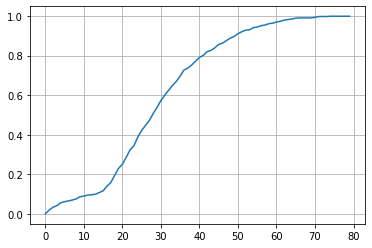

In [17]:
import matplotlib.pyplot as plt

plt.plot(range(int(np.min(ls_age)), int(np.max(ls_age))), cdf_age)
plt.grid()

## Use Seaborn or Matplotlib to plot CDF of Age 

In [36]:
import statsmodels
sns.distplot(df['Age'].dropna(), hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

ModuleNotFoundError: No module named 'statsmodels'

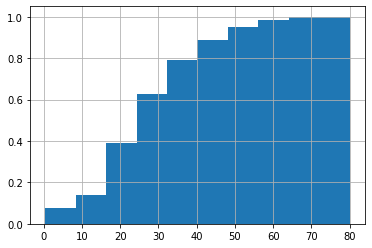

In [31]:
df['Age'].dropna().hist(cumulative=True, density=True)

## More about PDF

Sometimes we'll have more than one data sets we want to graph. For example, if we want to show the age of both male and female passengers.

PDFs can be displayed an alternative way when we have 2 or more lists, as seen in the example below:

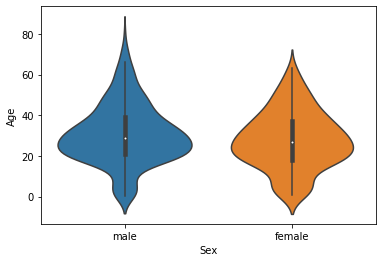

In [21]:
sns.violinplot(x="Sex", y="Age", data=df)

If you look at it sideways (tilt your head), it looks similar to the first PDF we saw!

## Normal Distribution

When we plot histograms or PDFs from an array, we may occasionally get graphs that have a _perfect_ bell shape curve. Histograms that have this shape have **normal distributions!**

These graphs are helpful because their shape allows us to easily compute the area!

An example of a PDF with a normal distibution is given below:

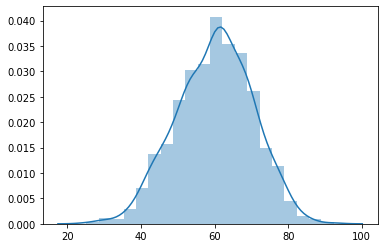

In [69]:
import numpy as np
import seaborn as sns

# Generate 1000 samples with 60 as its mean and 10 as its std
a = np.random.normal(60, 10, 1000)
sns.distplot(a, hist=True, kde=True, bins=20)

### **Note that the _entire area is always equal to 1 for any PDF._**

In [72]:
print(np.mean(a))
print(np.std(a))
print(len(a))

60.063152846634935
10.281516350810838
1000


## Activity: 

The DS 1.1 instructor just finished grading the final exam. He is reporting that the mean was 60 (with the possible score range from 0 to 100) with standard deviation of 10.

What is the probability that students got more than 70? Assume that the instructor plotted the PDF of the data and it was _normal_

**Hint:** If we can obtain area of the graph for everything less than 70, that's the same as getting the CDF at 70! How would this be useful?
**Hint:** look into this [library from the  scipy.stats documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm). It may be helpful :) 

In [77]:
from scipy.stats import norm

#print(1 - norm.cdf(70, loc=60, scale=10))

# or

print(norm.sf(70, loc=60, scale=10))

0.15865525393145707


This area we just calculated is called the _survival_

## Normal Distribution Properties:

When the data is Normally distributed:

- 68% of the data is captured within one standard deviation from the mean.
- 95% of the data is captured within two standard deviations from the mean.
- 99.7% of the data is captured within three standard deviations from the mean.

<br><img src="http://www.oswego.edu/~srp/stats/images/normal_34.gif" /><br>

## Activity:

Let's prove that these normal distribution properties are true. Show that about 68% of the values in our previous DS final exam example are in the [50, 70] range


0.703
0.956


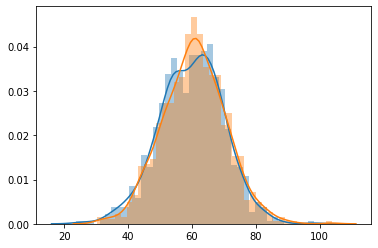

In [101]:
import seaborn as sns
import numpy as np

a = np.random.normal(60, 10, 1000)
sns.distplot(a, hist=True, kde=True, bins=40)
b = np.random.normal(60, 10, 1000)
sns.distplot(b, hist=True, kde=True, bins=40)

#norm.cdf(70, loc=60, scale=10) - norm.cdf(50, loc=60, scale=10)

def percentage_a(lower, upper, a):
    counter = 0
    for item in a:
        if item >= 50 and item <= 70:
            counter += 1      
    return (counter/len(a))
            
def percentage_b(lower, upper, b):
    counter = 0
    for item in b:
        if item >= 40 and item <= 80:
            counter += 1      
    return(counter / len(b))

print(percentage_a(50, 70, a))
print(percentage_b(40, 80, b))

## Scaling the Normal Ditribution

We can take any list of values which are normally distribute and apply simple arithmatic on the list such that the mean is 0 and the standard deviation is 1 for our new transformed list. We can do this through following the steps below:

For each of the values in the list, we will need to _subtract the mean of list from the value, and divide this difference by the standard deviation_

Let's walk through this using the DS final exam data and normally distributing it:

0.966713491913432

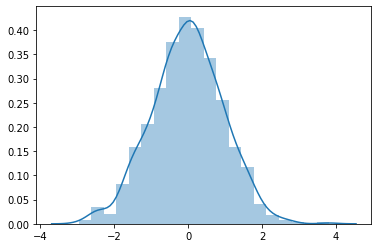

In [73]:
# Our list of exam scores with mean = 60, and std = 10
exam_scores = np.random.normal(60, 10, 1000)

normalized_scores = []
for score in exam_scores:
    # subtract the mean of list from the value, 
    # and divide this difference by the standard deviation
    normal_score = (score - 60)/10
    normalized_scores.append(normal_score)

sns.distplot(normalized_scores, hist=True, kde=True, bins=20)

np.mean(normalized_scores)
np.std(normalized_scores)

In [82]:
exam_scores = np.random.normal(60, 10, 1000)
for item in exam_scores:
    if item >= .7:
        num = item
    
print(num/len(exam_scores))


0.04979512383185349


## Z-Distribution 

**Z-distribution is another name for standard Normal distribution!** This is what we just calculated in the last example!

Following the process as outlined above will allow you to calculate the z-distribution of a data set!